## Observations and Insights 

The data suggest that: 

1. There is a moderate positive correlation (r = 0.53) between Mouse Weight (g) and Tumor Volume (mm3). 

2. On average, mice treated with Capomulin or Ramicane displayed a smaller final Tumor Volume (mm3) than those treated with Infubinol or Ceftamin. 

3. Mouse s185 displayed an overall decrease in Tumor Volume (mm3) after treatment with Capomulin. 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
results_merged = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])


# Display the data table for preview
results_merged


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
number_mice = len(results_merged["Mouse ID"].unique())
number_mice


249

In [72]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_ID = results_merged[results_merged.duplicated(["Mouse ID", "Timepoint"], keep = False)]
duplicate_ID


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_results = results_merged.drop_duplicates(subset = ["Mouse ID", "Timepoint"], keep = False)
mouse_results


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
number_mice_clean = len(mouse_results["Mouse ID"].unique())
number_mice_clean

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [7]:
tumor_volume = mouse_results.loc[:,["Drug Regimen", "Tumor Volume (mm3)"]]
tumor_volume_grouped = tumor_volume.groupby("Drug Regimen")
tumor_mean = tumor_volume_grouped["Tumor Volume (mm3)"].mean()
tumor_median = tumor_volume_grouped["Tumor Volume (mm3)"].median()
tumor_variance = tumor_volume_grouped["Tumor Volume (mm3)"].var()
tumor_sd = tumor_volume_grouped["Tumor Volume (mm3)"].std()
tumor_sem = tumor_volume_grouped["Tumor Volume (mm3)"].sem()

tumor_volume_merged = pd.merge(tumor_mean, tumor_median, how="left", on=["Drug Regimen"])

tumor_volume_merged["Variance"] = tumor_variance
tumor_volume_merged["Standard Deviation"] = tumor_sd
tumor_volume_merged["SEM"] = tumor_sem

tumor_volume_merged = tumor_volume_merged.rename(columns = {"Tumor Volume (mm3)_x": "Mean", "Tumor Volume (mm3)_y": "Median" })

tumor_volume_merged

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
#tumor_volume_2 = mouse_results.loc[:,["Drug Regimen", "Tumor Volume (mm3)"]]
# Using the aggregation method, produce the same summary statistics in a single line
tumor_volume_agg = tumor_volume.groupby(["Drug Regimen"]).agg(["mean", "median", "var", "std", "sem"])
tumor_volume_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.458254  50.854632  44.053659  6.637293  0.540135
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [82]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepoints_1 = mouse_results.loc[:,["Drug Regimen", "Timepoint"]]
timepoints_grouped = timepoints_1.groupby(["Drug Regimen"])
timepoints_2 = timepoints_grouped.count()

timepoints_2.plot(kind="bar", y="Timepoint", grid=False, figsize=(8,8),
              title="Drug Regimen Vs. Number of Timepoints")
plt.show()


,Timepoint
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,151
Ramicane,228
Stelasyn,181


<BarContainer object of 10 artists>

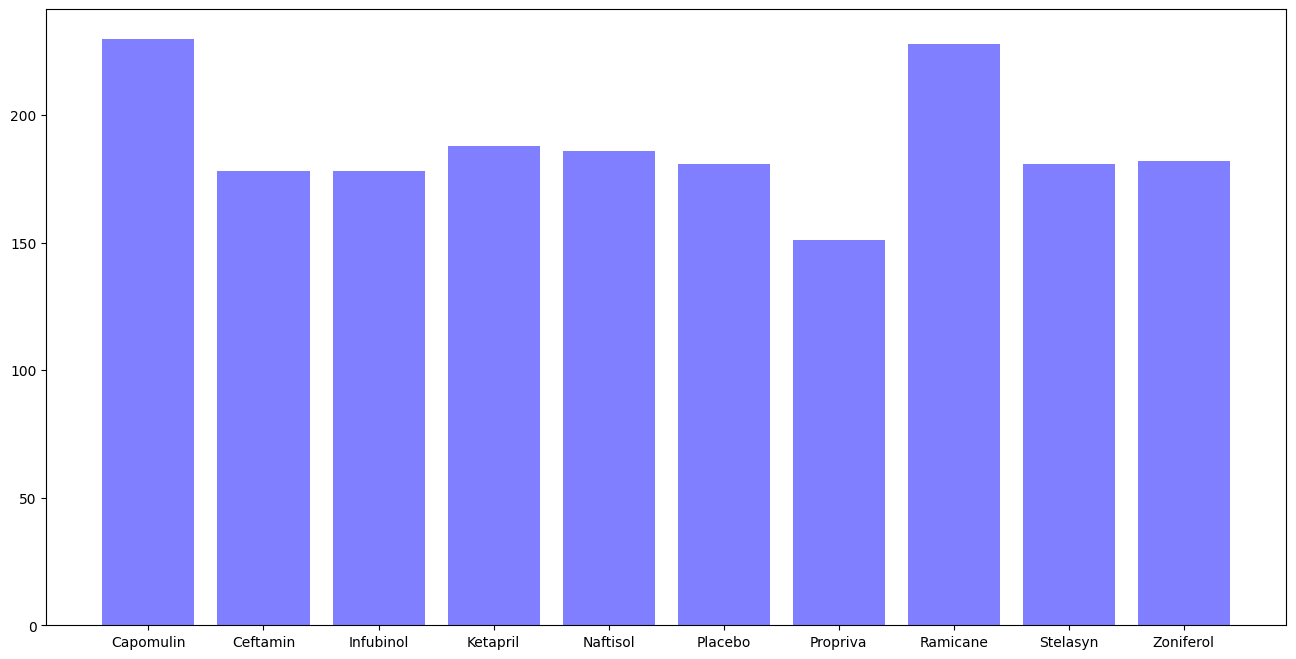

In [97]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.figure(figsize=(16,8))
plt.bar(timepoints_2.index.values, timepoints_2["Timepoint"], color='b', alpha=0.5, align="center")

In [108]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender1 = mouse_results.loc[:,["Timepoint", "Sex"]]
gender1_grouped = gender1.groupby(["Sex"])
gender1 = gender1_grouped.count()

gender_plot = pd.DataFrame({"Count": [925, 958]}, index = ["Female", "Male"])
plot = gender_plot.plot.pie( y = "Count", figsize = (5, 5))

,Timepoint
Sex,
Female,925
Male,958


([<matplotlib.patches.Wedge at 0x7f97627ad030>,
 [Text(-0.7299924150353834, -0.8228675920163636, 'Female'),
  Text(0.7299924150353835, 0.8228675920163635, 'Male')],
 [Text(-0.3981776809283909, -0.4488368683725619, '49.1%'),
  Text(0.39817768092839095, 0.44883686837256187, '50.9%')])

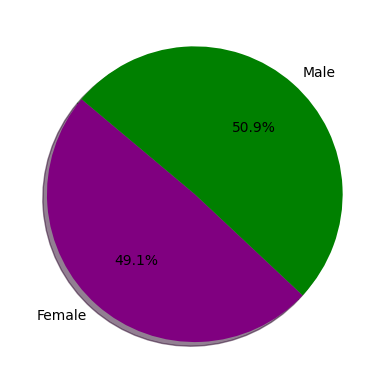

In [102]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of our pie chart
labels = ["Female", "Male"]

# The values of each section of the pie chart
sizes = [925, 958]

# The colors of each section of the pie chart
colors = ["purple", "green"]

# Tells matplotlib to separate the "Humans" section from the others
#explode = (0.1, 0, 0, 0)

plt.pie(sizes, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)



## Quartiles, Outliers and Boxplots

In [137]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

treatment1 = mouse_results.loc[:,["Mouse ID","Timepoint", "Drug Regimen", "Tumor Volume (mm3)"]]
treatment1.sort_values("Timepoint", ascending = False)
treatment1

# Start by getting the last (greatest) timepoint for each mouse

treatment1_clean = treatment1.drop_duplicates(subset = ["Mouse ID"], keep = "last")
treatment1_clean

capomulin_subset = treatment1_clean[treatment1_clean["Drug Regimen"] == "Capomulin"]
capomulin_subset.sort_values("Timepoint", ascending = False)
capomulin_list = capomulin_subset["Tumor Volume (mm3)"].values.tolist()
capomulin_list


[23.34359787,
 28.48403281,
 28.43096411,
 30.48598484,
 31.02392294,
 31.8962384,
 32.37735684,
 33.32909778,
 34.45529799,
 37.31184577,
 36.04104736,
 37.07402422,
 38.84687569,
 38.93963263,
 38.98287774,
 38.75326548,
 38.1251644,
 39.95234669,
 40.65812366,
 40.1592203,
 40.72857787,
 41.48300765,
 41.58152074,
 47.68596303,
 46.53920617]

In [123]:
ramicane_subset = treatment1_clean[treatment1_clean["Drug Regimen"] == "Ramicane"]
ramicane_list = ramicane_subset["Tumor Volume (mm3)"].values.tolist()
ramicane_list


[22.05012627,
 29.12847181,
 30.27623175,
 30.56462509,
 30.63869575,
 31.56046955,
 31.09533505,
 33.39765251,
 32.97852192,
 33.56240217,
 36.13485243,
 38.81036633,
 37.22565033,
 36.37451039,
 36.56165229,
 37.31123552,
 38.34200823,
 38.4076183,
 40.65900627,
 40.66771292,
 45.22086888,
 43.0475426,
 43.41938077,
 43.16637266,
 44.18345092]

In [124]:
infubinol_subset = treatment1_clean[treatment1_clean["Drug Regimen"] == "Infubinol"]
infubinol_list = infubinol_subset["Tumor Volume (mm3)"].values.tolist()
infubinol_list

[67.97341878,
 65.52574285,
 57.03186187,
 66.08306589,
 72.2267309,
 36.3213458,
 60.96971133,
 62.43540402,
 60.91876652,
 67.28962147,
 66.19691151,
 62.11727887,
 47.01036401,
 60.16518046,
 55.62942846,
 45.69933088,
 54.65654872,
 55.65068132,
 46.25011212,
 54.04860769,
 51.54243058,
 50.00513807,
 58.26844248,
 67.68556862,
 62.75445141]

In [125]:
ceftamin_subset = treatment1_clean[treatment1_clean["Drug Regimen"] == "Ceftamin"]
ceftamin_list = ceftamin_subset["Tumor Volume (mm3)"].values.tolist()
ceftamin_list

[62.99935619,
 45.0,
 56.05774909,
 55.74282869,
 48.72207785,
 47.7846818,
 61.84902336,
 68.92318457,
 67.74866174,
 57.91838132,
 46.78453491,
 59.85195552,
 64.29983003,
 59.74190064,
 61.43389223,
 64.19234114,
 45.0,
 52.92534846,
 45.0,
 67.52748237,
 45.0,
 64.63494887,
 61.38666032,
 68.59474498,
 64.72983655]

In [138]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create a list to fill with tumor vol data (for plotting)
tumor_volume = [capomulin_list, ramicane_list, infubinol_list, ceftamin_list]
 

[[23.34359787,
  28.48403281,
  28.43096411,
  30.48598484,
  31.02392294,
  31.8962384,
  32.37735684,
  33.32909778,
  34.45529799,
  37.31184577,
  36.04104736,
  37.07402422,
  38.84687569,
  38.93963263,
  38.98287774,
  38.75326548,
  38.1251644,
  39.95234669,
  40.65812366,
  40.1592203,
  40.72857787,
  41.48300765,
  41.58152074,
  47.68596303,
  46.53920617],
 [22.05012627,
  29.12847181,
  30.27623175,
  30.56462509,
  30.63869575,
  31.56046955,
  31.09533505,
  33.39765251,
  32.97852192,
  33.56240217,
  36.13485243,
  38.81036633,
  37.22565033,
  36.37451039,
  36.56165229,
  37.31123552,
  38.34200823,
  38.4076183,
  40.65900627,
  40.66771292,
  45.22086888,
  43.0475426,
  43.41938077,
  43.16637266,
  44.18345092],
 [67.97341878,
  65.52574285,
  57.03186187,
  66.08306589,
  72.2267309,
  36.3213458,
  60.96971133,
  62.43540402,
  60.91876652,
  67.28962147,
  66.19691151,
  62.11727887,
  47.01036401,
  60.16518046,
  55.62942846,
  45.69933088,
  54.65654872,


In [142]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
first = st.scoreatpercentile(capomulin_list, 25)
second = st.scoreatpercentile(capomulin_list, 75)
IQR = second - first

print("Coapomulin Outliers: ")
for i in capomulin_list: 
    if i < (first - 1.5 * IQR) or i > (second + 1.5 * IQR): 
        print(i)


Coapomulin Outliers: 


In [143]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
first = st.scoreatpercentile(ramicane_list, 25)
second = st.scoreatpercentile(ramicane_list, 75)
IQR = second - first

print("Ramicane Outliers: ")
for i in ramicane_list: 
    if i < (first - 1.5 * IQR) or i > (second + 1.5 * IQR): 
        print(i)

Ramicane Outliers: 


In [144]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
first = st.scoreatpercentile(infubinol_list, 25)
second = st.scoreatpercentile(infubinol_list, 75)
IQR = second - first

print("Infubinol Outliers: ")
for i in infubinol_list: 
    if i < (first - 1.5 * IQR) or i > (second + 1.5 * IQR): 
        print(i)

Infubinol Outliers: 
36.3213458


In [145]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
first = st.scoreatpercentile(ceftamin_list, 25)
second = st.scoreatpercentile(ceftamin_list, 75)
IQR = second - first

print("Ceftamin Outliers: ")
for i in ceftamin_list: 
    if i < (first - 1.5 * IQR) or i > (second + 1.5 * IQR): 
        print(i)

Ceftamin Outliers: 


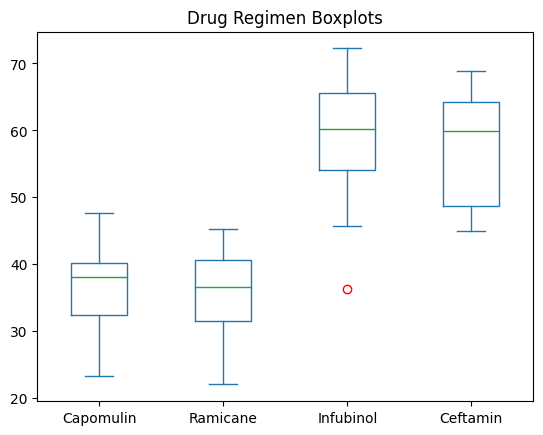

In [155]:
data = pd.DataFrame({"Capomulin": capomulin_list, "Ramicane": ramicane_list, "Infubinol": infubinol_list, "Ceftamin": ceftamin_list})
markers = dict(markeredgecolor = "r")
ax = data[["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]].plot(kind = "box", title = "Drug Regimen Boxplots", flierprops = markers)
plt.show()

## Line and Scatter Plots

In [156]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_subset = mouse_results[mouse_results["Drug Regimen"] == "Capomulin"]
capomulin_subset


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [159]:
mouse_subset = capomulin_subset[capomulin_subset["Mouse ID"] == "s185"]
mouse_subset

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


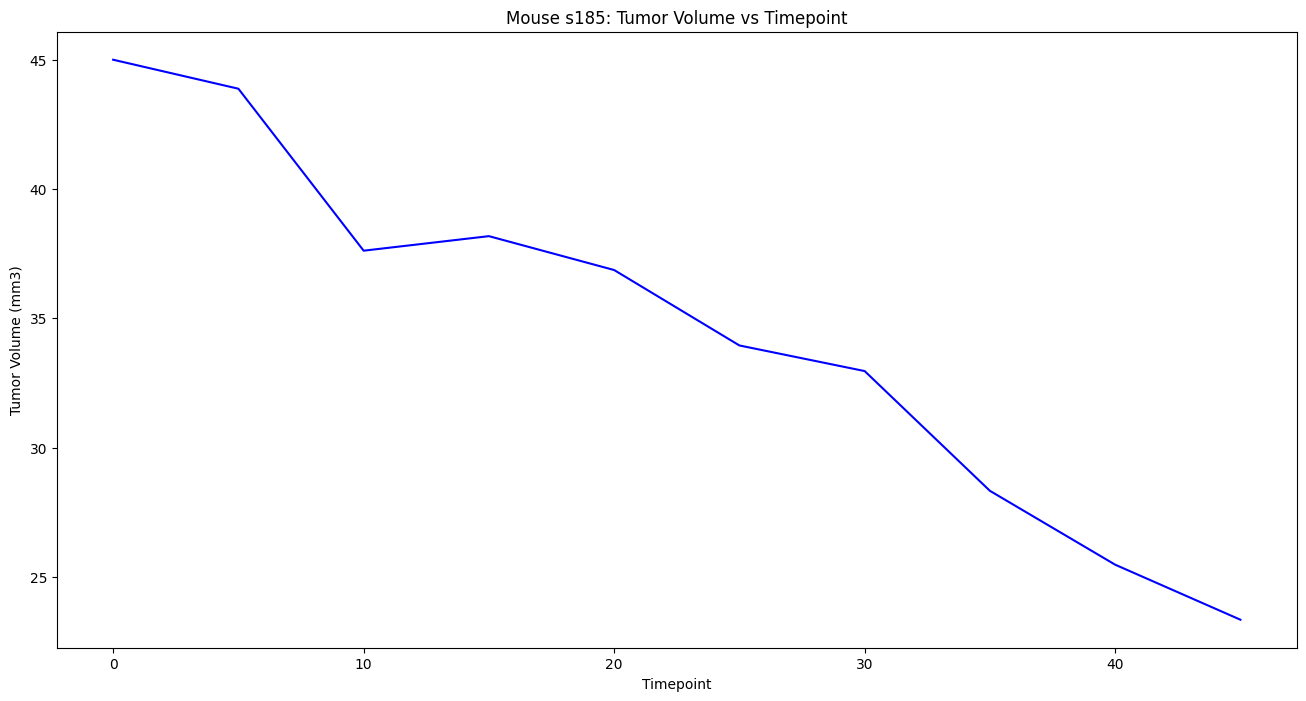

In [164]:
plt.figure(figsize=(16,8))
plt.plot(mouse_subset["Timepoint"], mouse_subset["Tumor Volume (mm3)"], color='b')
plt.title("Mouse s185: Tumor Volume vs Timepoint")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [171]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_subset2 = capomulin_subset.loc[:,["Weight (g)", "Tumor Volume (mm3)"]]

weight = capomulin_subset2["Weight (g)"]
volume = capomulin_subset2["Tumor Volume (mm3)"]

plt.figure(figsize=(16,8))
plt.scatter(weight, volume, color='b')
plt.title("Capomulin Tumor Volume vs Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

Weight (g)            19.965217
Tumor Volume (mm3)    40.675741
dtype: float64

## Correlation and Regression

In [177]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation coefficient between Mouse Weight (g) and Tumor Volume (mm3) is {round(st.pearsonr(weight, volume)[0],2)}")


The correlation coefficient between Mouse Weight (g) and Tumor Volume (mm3) is 0.53


In [184]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, volume)

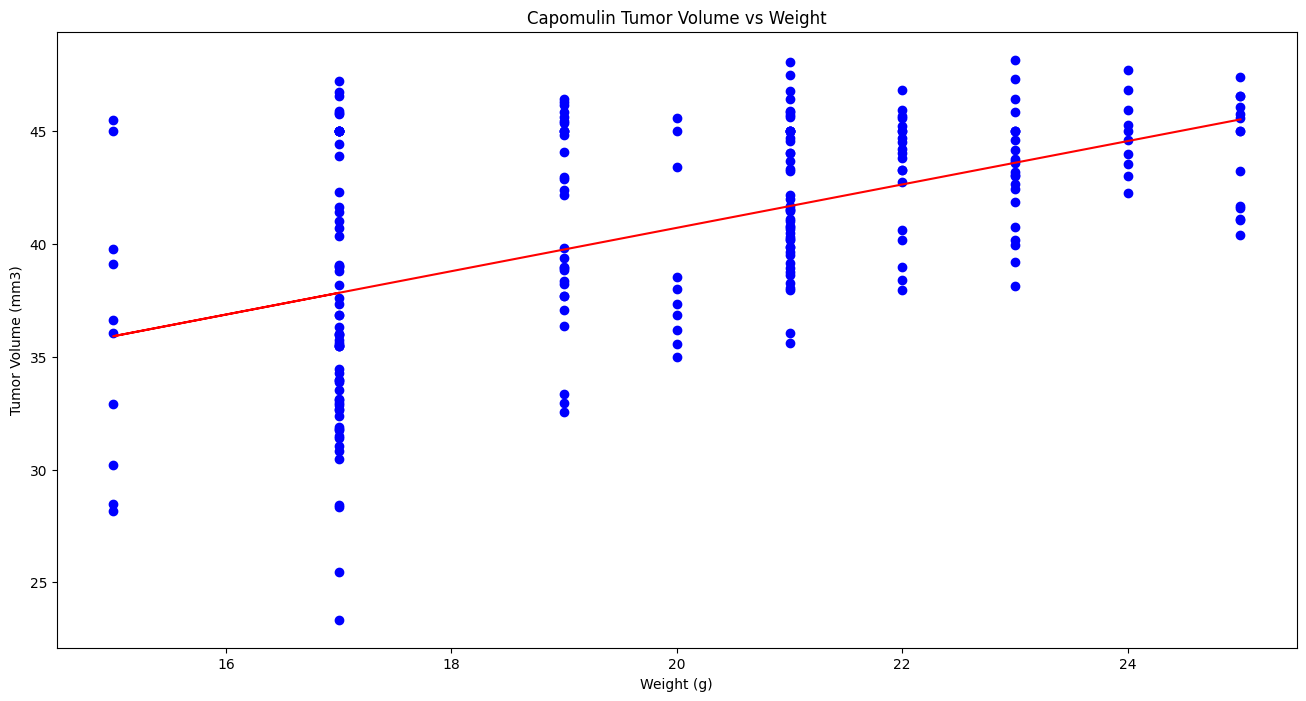

In [185]:
# Need to print the linear regression model?
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(16,8))
plt.scatter(weight, volume, color='b')
plt.plot(weight,regress_values,"r-")
plt.title("Capomulin Tumor Volume vs Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
